In [ ]:
# Yiyang Liu
# 07/2024
# W2V on the small data set
# versus
# W2V pre-trained with large data set.
# Not recommended for fine-tuning because there W2V is not the best for fine_tunning.

In [1]:
# THINGS TO TRY OUT：
# word2vec
# CoVe
# BERT or some variation

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
from PIL import Image
import os, sys
from wordcloud import WordCloud, STOPWORDS

import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
#import multiprocessing



warnings.filterwarnings('ignore')
%matplotlib inline




In [2]:
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
import gensim.downloader as api
from gensim.models import KeyedVectors

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA

In [3]:
#without pretrained models: let's just expect a bunch of nonsense.


text_input = pd.read_csv('TEXT_sentences.csv')
text_input = list(text_input['text_corrected'])



text_input = [word_tokenize(s) for s in text_input]
print(text_input[0])


['look', 'there', 'my', 'friend', 'lightyear', 'now', 'all', 'sohalikut', 'trend', 'play', 'the', '10', 'years', 'challenge', 'at', 'facebook']


In [201]:
no_pre_model = Word2Vec(sentences = text_input ,
                     window=2,
                     vector_size=100,
                    min_count=1,
                     sample=4e-5, 
                     alpha=0.0008, 
                     min_alpha=0.00007, 
                     negative=5,
                     workers=4)

no_pre_model.save('meme_text_w2v')

In [202]:
words = list(no_pre_model.wv.key_to_index.keys())
#print(words)
embedding = list(no_pre_model.wv.vectors)

In [203]:
print(len(embedding[0]))

100


In [204]:
TD = PCA(n_components = 2)
x1,y1 = TD.fit_transform(embedding).T

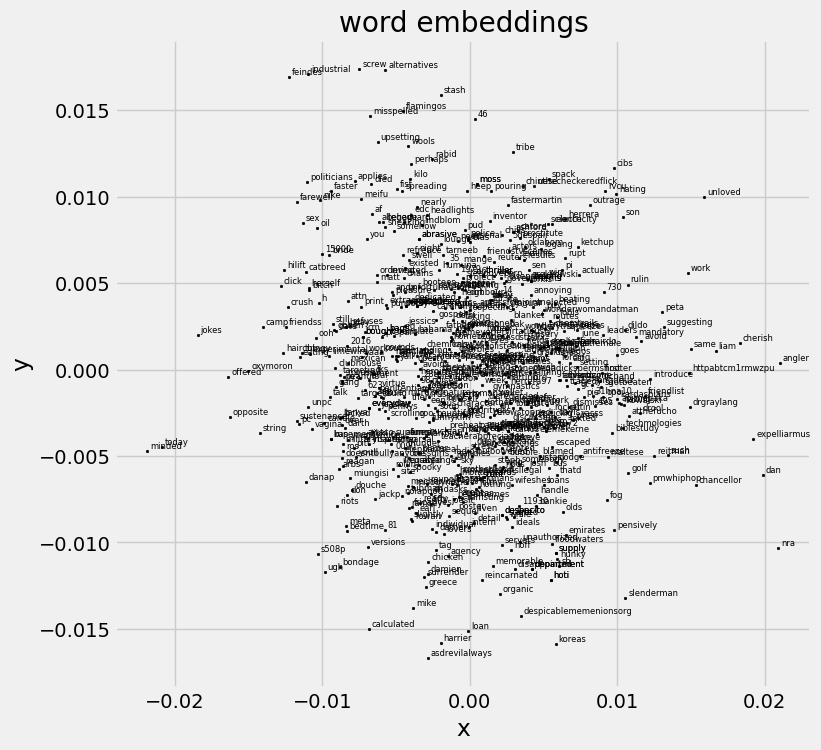

In [205]:
idx = np.random.randint(0,len(x),size = 600)
#print(idx)
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x1[idx],y1[idx], c='k',s = 3)

for i in idx:
    ax.annotate(
        words[i],
        (x1[i], y1[i]),
        xytext=(2, 2),
        textcoords='offset points',fontsize = 6
    )

plt.title('word embeddings')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [206]:
no_pre_model.wv.most_similar('spiderman',topn = 20)

[('miserably', 0.4717639684677124),
 ('military', 0.3870091140270233),
 ('marvel', 0.36532461643218994),
 ('meaning', 0.35705476999282837),
 ('bigbangtheoryupdates', 0.3449583649635315),
 ('macchio', 0.3436245918273926),
 ('laina', 0.3403884172439575),
 ('22', 0.33519479632377625),
 ('remembers', 0.331891804933548),
 ('their', 0.3273652195930481),
 ('lakhs', 0.32046887278556824),
 ('md', 0.31403446197509766),
 ('aplussize', 0.3116171658039093),
 ('titanics', 0.30460938811302185),
 ('four', 0.29823336005210876),
 ('rosetta', 0.29572978615760803),
 ('382', 0.29365524649620056),
 ('09', 0.28941115736961365),
 ('trusts', 0.28735941648483276),
 ('caribbean', 0.28609275817871094)]

In [207]:
no_pre_model.wv.most_similar('girlfriend',topn = 20)

[('north', 0.3839672803878784),
 ('leaders', 0.36196210980415344),
 ('got', 0.33931711316108704),
 ('weddings', 0.33135905861854553),
 ('tomorrow', 0.32997211813926697),
 ('daddies', 0.32921475172042847),
 ('pregnancies', 0.3285027742385864),
 ('starwarstrivia', 0.32497918605804443),
 ('fantasylland', 0.31568920612335205),
 ('avatars', 0.30884578824043274),
 ('6pm', 0.30873849987983704),
 ('microsoft', 0.3057708144187927),
 ('guide', 0.305305540561676),
 ('rebels', 0.3052593469619751),
 ('huk', 0.30286192893981934),
 ('kingslayer', 0.3015339970588684),
 ('person', 0.2989959418773651),
 ('raga', 0.29669541120529175),
 ('pain', 0.2957776188850403),
 ('shirtspic', 0.2955479323863983)]

In [61]:
print(api.info('fasttext-wiki-news-subwords-300'))

Pre_Vector = api.load('fasttext-wiki-news-subwords-300') 


#Pre_Vector = api.load('fake-news')



{'num_records': 999999, 'file_size': 1005007116, 'base_dataset': 'Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens)', 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/fasttext-wiki-news-subwords-300/__init__.py', 'license': 'https://creativecommons.org/licenses/by-sa/3.0/', 'parameters': {'dimension': 300}, 'description': '1 million word vectors trained on Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens).', 'read_more': ['https://fasttext.cc/docs/en/english-vectors.html', 'https://arxiv.org/abs/1712.09405', 'https://arxiv.org/abs/1607.01759'], 'checksum': 'de2bb3a20c46ce65c9c131e1ad9a77af', 'file_name': 'fasttext-wiki-news-subwords-300.gz', 'parts': 1}


In [62]:
print(type(Pre_Vector))
print(dir(Pre_Vector))

<class 'gensim.models.keyedvectors.KeyedVectors'>
['__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_adapt_by_suffix', '_load_specials', '_log_evaluate_word_analogies', '_save_specials', '_smart_save', '_upconvert_old_d2vkv', '_upconvert_old_vocab', 'add_lifecycle_event', 'add_vector', 'add_vectors', 'allocate_vecattrs', 'closer_than', 'cosine_similarities', 'distance', 'distances', 'doesnt_match', 'evaluate_word_analogies', 'evaluate_word_pairs', 'expandos', 'fill_norms', 'get_index', 'get_mean_vector', 'get_normed_vectors', 'get_vecattr', 'get_vector', 'has_index_for', 'index2entity', 'index2word', 'index_to_key', 'init_

In [65]:
#print(type(Pre_Vector))

pretrained_model = Word2Vec(vector_size=300, 
                            window=2, 
                            min_count=1,  
                            alpha=0.001, 
                           workers=4, 
                            sg=1,
                            negative = 100,
                            sample=1e-4,
                            min_alpha=0.00007)
pretrained_model.build_vocab(text_input)
pretrained_model.build_vocab([list(Pre_Vector.index_to_key)], update=True) #changed to True 0719
#pretrained_model.wv.intersect_word2vec_format(Pre_Vector, binary=False, lockf=1.0)
pretrained_model.wv.vectors = Pre_Vector.vectors #depending on what the loaded embedding is.




In [ ]:
#print((pretrained_model.wv)) 

# so here is the problem. Unable to update vocab???

In [ ]:
#print(pretrained_model.epochs)

In [ ]:

#pretrained_model.train(text_input, total_examples=len(text_input), epochs=round(pretrained_model.epochs*2))


In [66]:
word_embeddings = np.array([ pretrained_model.wv[k] if k in pretrained_model.wv else np.zeros(300) for k in list(no_pre_model.wv.key_to_index.keys()) ])
word_embeddings.shape # Should be len(vocab) by 300

#word_embeddings = pretrained_model.wv.index_to_key

(12405, 300)

In [107]:
vocab = list(no_pre_model.wv.key_to_index.keys())

new_keyed_vectors = KeyedVectors(vector_size=300)

new_keyed_vectors.add_vectors(vocab, word_embeddings)

In [108]:
TD = PCA(n_components = 2)
x,y = TD.fit_transform(word_embeddings).T

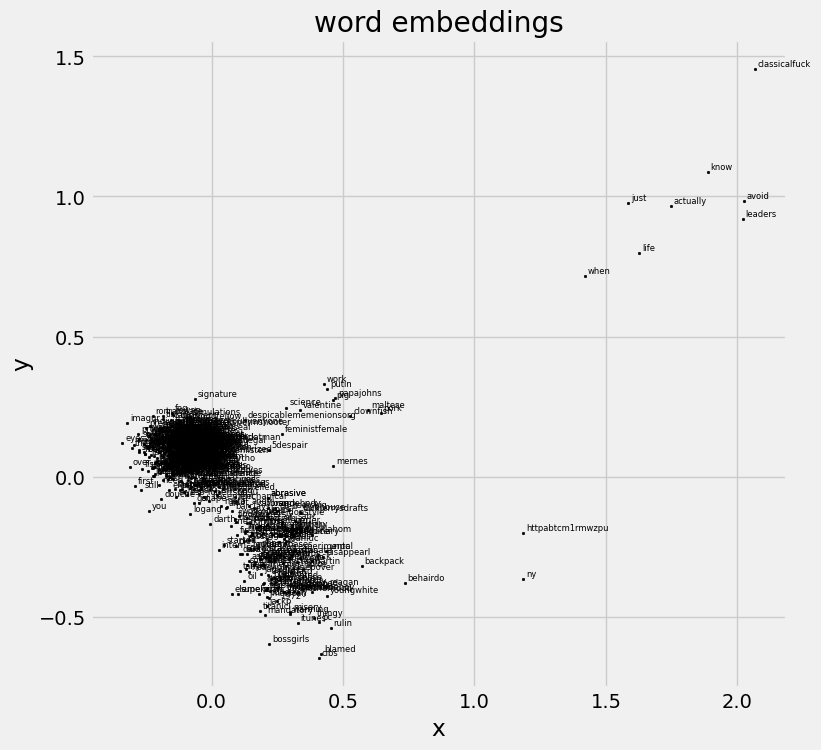

In [208]:
#idx = np.random.randint(0,len(x),size = 600)
#print(idx)
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x[idx],y[idx], c='k',s = 3)

for i in idx:
    ax.annotate(
        vocab[i],
        (x[i], y[i]),
        xytext=(2, 2),
        textcoords='offset points',fontsize = 6
    )

plt.title('word embeddings')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [122]:

new_keyed_vectors.most_similar('spiderman', topn=20)


[('once', 0.875674307346344),
 ('steal', 0.7665658593177795),
 ('dreams', 0.7260428667068481),
 ('brag', 0.698144793510437),
 ('draft', 0.6967677474021912),
 ('relief', 0.6917508244514465),
 ('person', 0.6830350756645203),
 ('dawg', 0.6801578402519226),
 ('disneyland', 0.6778668165206909),
 ('respond', 0.6738029718399048),
 ('has', 0.669880747795105),
 ('including', 0.6675717830657959),
 ('nus', 0.6644987463951111),
 ('721', 0.6384527087211609),
 ('lay', 0.6288000345230103),
 ('ocean', 0.6268476247787476),
 ('savage', 0.6254241466522217),
 ('employees', 0.624626874923706),
 ('meliodas', 0.6156992316246033),
 ('late', 0.6153392195701599)]

In [115]:
new_keyed_vectors.most_similar('girlfriend',topn = 20)

[('original', 0.9491689801216125),
 ('mask', 0.9027496576309204),
 ('express', 0.8578130006790161),
 ('zigglers', 0.8310129642486572),
 ('female', 0.8202158212661743),
 ('5despair', 0.7962609529495239),
 ('bitch', 0.679740309715271),
 ('sacrifices', 0.6623194217681885),
 ('beers', 0.6614477038383484),
 ('goya', 0.6558980345726013),
 ('give', 0.6553709506988525),
 ('abrasive', 0.6490028500556946),
 ('gettyimages', 0.6421309113502502),
 ('pinterest', 0.6413593888282776),
 ('better', 0.6327898502349854),
 ('nu', 0.6215147972106934),
 ('banned', 0.6210591793060303),
 ('krages', 0.6204113960266113),
 ('toxic', 0.6133087873458862),
 ('kat', 0.6082637906074524)]